<a href="https://colab.research.google.com/github/biswajiti/Stock-Price-Prediction/blob/main/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM ML Model Developed On Google Stock to Predict Price : Project Overview**

## **Final Model Outcomes:**
1. It is dynamic, every day the model will be auto updated
2. The model is applicable for any stock based on stock ticker
3. The model gives todays predicted price based on past values using long short term memory (LSTM) method. 
4.  The final model presentation graph indicates 100 days moving averages line is below the 200 days moving averages line, that means downtrend may further persist. 

# **Scope of work:**
Here data gathered through web scrape from yahoo. The Google Stock price data collected based on stock ticker 'GOOG'. Time period mentioned as maximum duration available till last trading day. 

Indexed the data, scale it down to standardized data. 

Featured engineering had to do by dropping some columns. 

Some graphical plotting like 100days and 200days moving averages were presenred on the data set. 

The whole data set divided into two parts in the ratio of 70:30 for training and testing to Develop LSTM ML Stock prediction model using tensorflow.  

Based on testing data set the predicted values were calculated based on the model developed and ploted it graphically. 


# **Module / Libraries Required:** 
1. Yahoo Finance python module to scrape data from yahoo 
2. pandas to form dictionaries of columns with trading data, indexing, drop columns, dataframe shape identify, dividing data for training and testing,  etc.  
3. numpay for numerical calculations like moving averages etc. 
4. matplotlib for graphycal presentation 
5. MinMaxScaler to standardize data into a common scale with mean zero and variance as 1.
6. tensorflow.keras:  
i) layer: Dense, Dropout and LSTM for nural network multiple layers input and output. 
ii) model: model used sequential 
iii) optimizer: objective was to improve the overall model in every iteration so Adam optimizer used with epoch=10. 
iv) loss function used: mean squared error used.   

# **Challenges Faced:** 
To make the program applicable for other stocks few challenges had to face.
1. Time frame: to avoid data under flow or data over flow issues, max time period condsidered
2. Used google colab, some codes were running well on local machine, but giving some error on colab.   

# **Future Scope:** 
1. Measure under valued or over valued of Google stock
2. Develop an app in python to apply the model for every stock with an user friendly GUI.  

# **Following Are Coding Steps**

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 16.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
df1 = yf.Ticker("GOOG")

In [ ]:
df2 = df1.history(period="max", auto_adjustment=True)
print("Company Sector : ", df1.info['sector'])
print("Price Earnings Ratio : ", df1.info['trailingPE'])
print(" Company Beta : ", df1.info['beta'])

Company Sector :  Communication Services
Price Earnings Ratio :  21.083818
 Company Beta :  1.099616


In [ ]:
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,44871361,0,0.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942874,0,0.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342897,0,0.0
2004-08-24,55.412300,55.591629,51.591621,52.239197,15319808,0,0.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232276,0,0.0
...,...,...,...,...,...,...,...
2022-07-07,2320.159912,2397.239990,2310.679932,2386.120117,1609200,0,0.0
2022-07-08,2351.000000,2408.699951,2350.280029,2403.370117,1453200,0,0.0
2022-07-11,2373.000000,2375.889893,2324.689941,2330.449951,1335900,0,0.0


# New Section

In [ ]:
df3 =df2.reset_index()

In [ ]:
df3 = df3.drop(['Date','Dividends', 'Stock Splits'], axis=1)

In [ ]:
df3.head()

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897
3,55.412300,55.591629,51.591621,52.239197,15319808
4,52.284027,53.798351,51.746044,52.802086,9232276


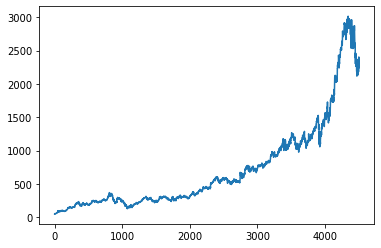

In [ ]:
plt.plot(df3.Close)

In [ ]:
ma100 = df3.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4501    2472.301304
4502    2469.509004
4503    2465.753503
4504    2461.438303
4505    2456.378203
Name: Close, Length: 4506, dtype: float64

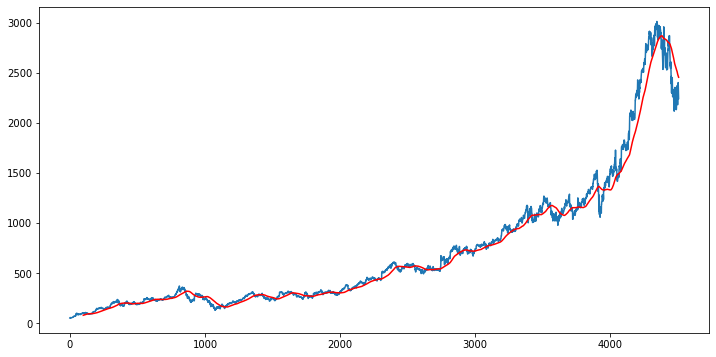

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df3.Close)
plt.plot(ma100,'r')

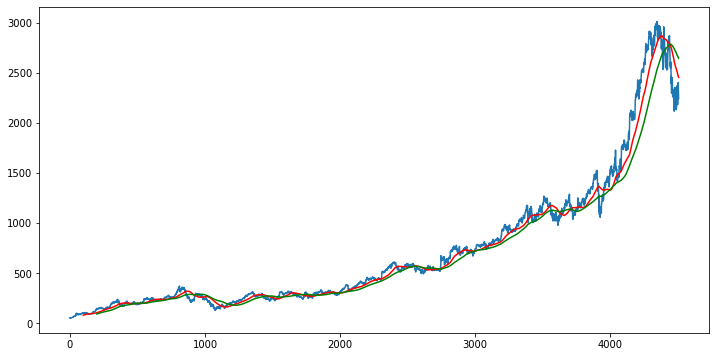

In [ ]:
ma200 = df3.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df3.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df3.shape

(4506, 5)

In [ ]:
data_training = pd.DataFrame(df3['Close'][0:int(len(df3)*0.70)])
data_testing = pd.DataFrame(df3['Close'][int(len(df3)*0.70):int(len(df3))])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[2.09182911e-04],
       [5.26117375e-03],
       [5.95209918e-03],
       ...,
       [9.91054332e-01],
       [9.91868754e-01],
       [9.84144641e-01]])

In [ ]:
x_train = [] 
y_train = []

for i in range(100, data_training_array.shape[0]): 
    x_train.append(data_training_array[i-100:i]) 
    y_train.append(data_training_array[i,0]) 
    X_train, Y_train = np.array(x_train), np.array(y_train)

In [ ]:
X_train.shape

(3054, 100, 1)

In [ ]:
Y_train.shape

(3054,)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model = Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1],1),activation='relu',return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(60,activation='relu'))
model.add(Dropout(0.3))
      

    
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                26640     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 37,101
Trainable params: 37,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
96/96 [==============================] - 13s 101ms/step - loss: 0.0331
Epoch 2/10
96/96 [==============================] - 10s 100ms/step - loss: 0.0049
Epoch 3/10
96/96 [==============================] - 10s 100ms/step - loss: 0.0043
Epoch 4/10
96/96 [==============================] - 9s 98ms/step - loss: 0.0041
Epoch 5/10
96/96 [==============================] - 9s 98ms/step - loss: 0.0041
Epoch 6/10
96/96 [==============================] - 10s 101ms/step - loss: 0.0033
Epoch 7/10
96/96 [==============================] - 10s 102ms/step - loss: 0.0034
Epoch 8/10
96/96 [==============================] - 10s 99ms/step - loss: 0.0031
Epoch 9/10
96/96 [==============================] - 11s 115ms/step - loss: 0.0031
Epoch 10/10
96/96 [==============================] - 10s 102ms/step - loss: 0.0027


In [ ]:
model.save('stockpredict.h5')

In [ ]:
past_100_days =data_training.tail(100)

In [ ]:
dfs = [past_100_days,data_testing]

In [ ]:
final_df = pd.concat( dfs,axis=0,ignore_index=True)

final_df.shape

(1452, 1)

In [ ]:
input_data= scaler.fit_transform(final_df)

input_data

array([[0.01772967],
       [0.01790087],
       [0.01711953],
       ...,
       [0.69986831],
       [0.68518065],
       [0.6618059 ]])

In [ ]:
x_test = [] 
y_test = []

for i in range(100, input_data.shape[0]): 
    x_test.append(input_data[i-100:i]) 
    y_test.append(input_data[i,0]) 
    X_test, Y_test = np.array(x_test), np.array(y_test)

print(X_test.shape)
print(Y_test.shape)

(1352, 100, 1)
(1352,)


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

(1352, 1)

In [ ]:
scaler.scale_

array([0.00043896])

In [ ]:
scale_factor= 1/0.00043896
y_pred = y_pred * scale_factor
Y_test = Y_test * scale_factor

<function matplotlib.pyplot.show>

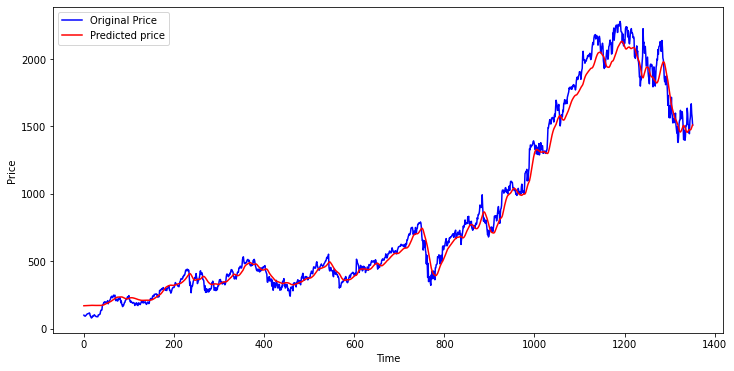

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot (Y_test, 'b', label ='Original Price')
plt.plot(y_pred, 'r', label ='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

In [ ]:
full_data1 = pd.DataFrame(df3['Close'])
full_data= scaler.fit_transform(full_data1)
full_data

array([[5.54543500e-05],
       [1.39473616e-03],
       [1.57790036e-03],
       ...,
       [7.69350013e-01],
       [7.58062604e-01],
       [7.40099209e-01]])

In [ ]:
x_test = [] 
y_test = []

for i in range(100, full_data.shape[0]): 
    x_test.append(full_data[i-100:i]) 
    y_test.append(full_data[i,0]) 
    X_test, Y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(X_test.shape)
print(Y_test.shape)

(4406, 100, 1)
(4406,)


In [ ]:
full_pred = model.predict(X_test)
full_pred.shape

(4406, 1)

In [ ]:
scaler.scale_

array([0.00033734])

In [ ]:
scale_factor= 1/0.00033734
full_pred = full_pred * scale_factor
Y_actual = Y_test * scale_factor

# ***Final Model Presentation: ***
Multiple prices plots in a single graph
1. Plot of actual price data Vs 
2. Predicted price data Vs 
3. 100 Days Moving Averages data Vs 
4. 200 Days Moving Averages data

<function matplotlib.pyplot.show>

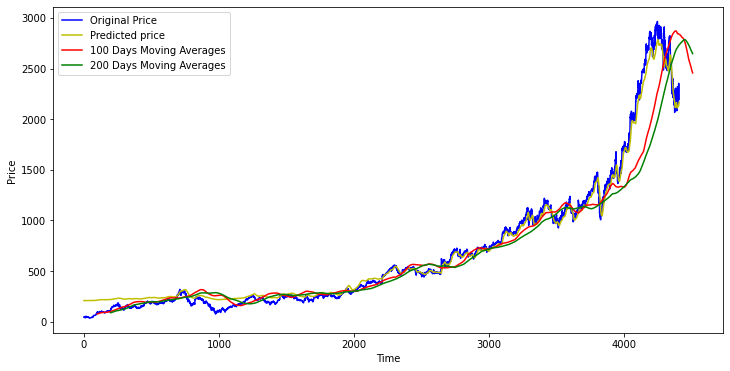

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot (Y_actual, 'b', label ='Original Price')
plt.plot(full_pred, 'y', label ='Predicted price')
plt.plot(ma100,'r', label ='100 Days Moving Averages')
plt.plot(ma200,'g', label ='200 Days Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

# ***Model Last 5 Predicted Values: ***

In [ ]:
full_pred = pd.DataFrame(full_pred)
full_pred.tail()

,0
4401,2132.464111
4402,2139.206787
4403,2149.478760
4404,2159.195801
4405,2166.871582


# **Business Summary At A Glance:**

In [ ]:
print("Company Sector : ", df1.info['sector'])
print("Price Earnings Ratio : ", df1.info['trailingPE'])
print(" Company Beta : ", df1.info['beta'])

Company Sector :  Communication Services
Price Earnings Ratio :  21.095123
 Company Beta :  1.099616
